In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("환경+날씨_연도별 미세먼지 키워드.csv",encoding='cp949')
import numpy as np
import matplotlib.pyplot as plt

df

주의보_df = pd.read_csv("경보발령수(년도,발령수).csv", engine="python")
주의보_df

,년도,발령수
0,2007,2
1,2008,2
2,2009,2
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6


In [9]:
주의보_df.drop(주의보_df[(주의보_df['년도'] >2021)].index, inplace=True)
주의보_df

,년도,발령수
0,2007,2
1,2008,2
2,2009,2
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6


In [10]:
주의보_df.drop(주의보_df[(주의보_df['년도'] < 2010)].index, inplace=True)
주의보_df

,년도,발령수
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6
10,2017,11
11,2018,18
12,2019,33


In [11]:
df

,년도,count
0,2010,1
1,2011,10
2,2012,1
3,2013,117
4,2014,251
5,2015,269
6,2016,513
7,2017,567
8,2018,721
9,2019,829


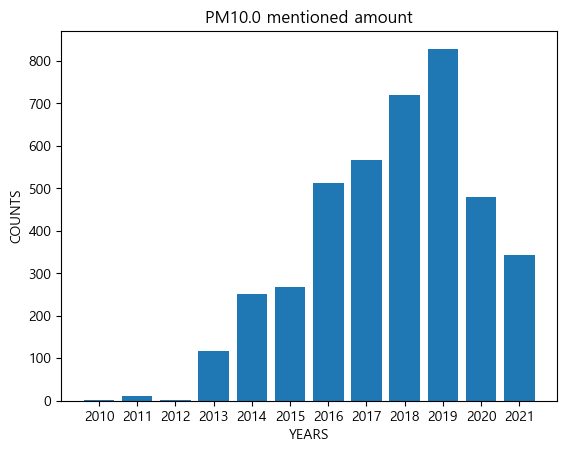

In [16]:
#연도별 미세먼지 언급량 증가 추이 시각화
x = np.arange(12)
years = ['2010','2011', '2012', '2013','2014','2015','2016','2017','2018','2019','2020','2021']
values = [1,10,1,117,251,269,513,567,721,829,479,343]

plt.bar(x, values)
plt.xticks(x, years)

plt.title('PM10.0 mentioned amount')
plt.xlabel('YEARS')
plt.ylabel('COUNTS')

plt.show()

In [12]:
new_merged_five_df = pd.merge(주의보_df, df)
new_merged_five_df

,년도,발령수,count
0,2010,1,1
1,2011,0,10
2,2012,0,1
3,2013,2,117
4,2014,8,251
5,2015,9,269
6,2016,6,513
7,2017,11,567
8,2018,18,721
9,2019,33,829


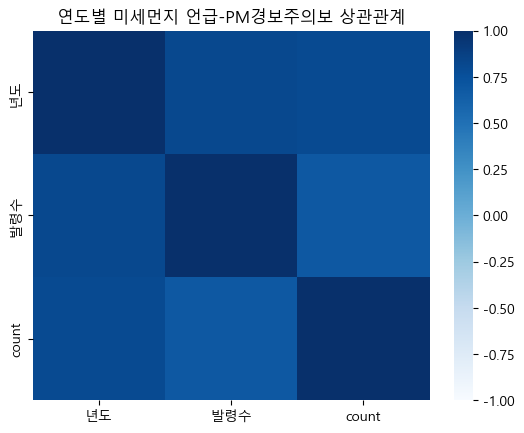

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = new_merged_five_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues, vmin = -1.0, vmax=1.0, )  
plt.title('연도별 미세먼지 언급-PM경보주의보 상관관계')
plt.show()

In [14]:
# cor_target_abs0 = cor['진료수'].sort_values(ascending=False)
# print(cor_target_abs0)


cor_target = cor['count']
print(cor_target)

년도       0.798962
발령수      0.693591
count    1.000000
Name: count, dtype: float64


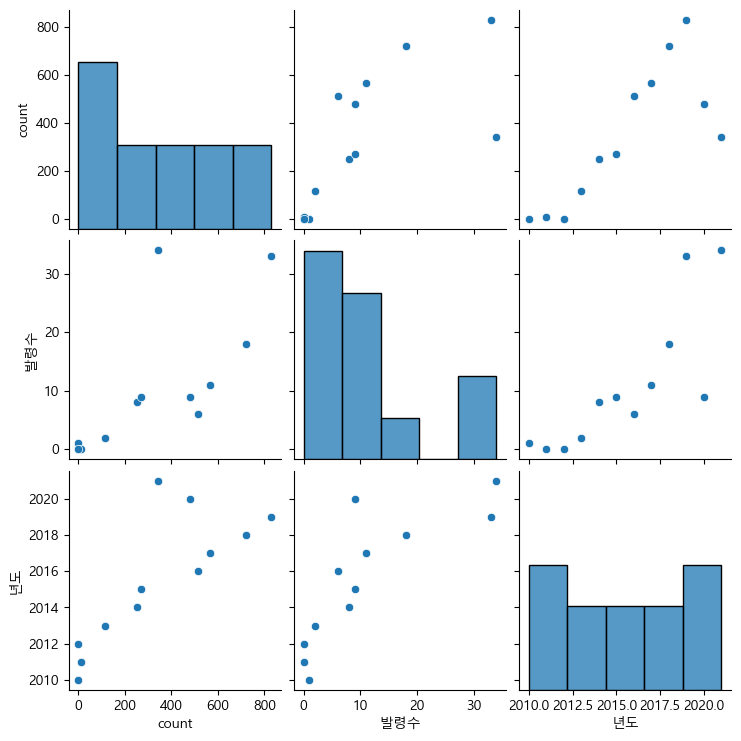

In [15]:
#산점도로 표현
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
#sns.set(style='whitegrid')
sns.pairplot(new_merged_five_df[['count', '발령수', 
                     '년도']])

plt.show()